# Peer-review Assignment for Data Visualization with Python

A survey was conducted to gauge an audience interest in different data science topics, namely:

- Big Data (Spark / Hadoop)
- Data Analysis / Statistics
- Data Journalism
- Data Visualization
- Deep Learning
- Machine Learning

The participants had three options for each topic: ***Very Interested, Somewhat interested, and Not interested***. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: *[Topic_Survey_Assignment](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv)*.


## Question 1

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

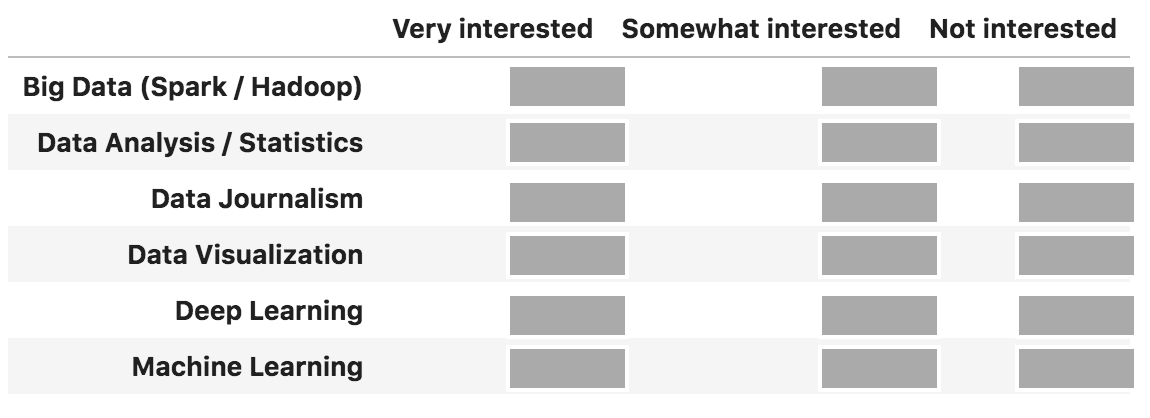

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Answer

df_survey = pd.read_csv('https://drive.google.com/uc?export=download&id=1tOYN0yJoUaecXz8jZDePrVgLIlYb0Lj0')
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Question 2

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

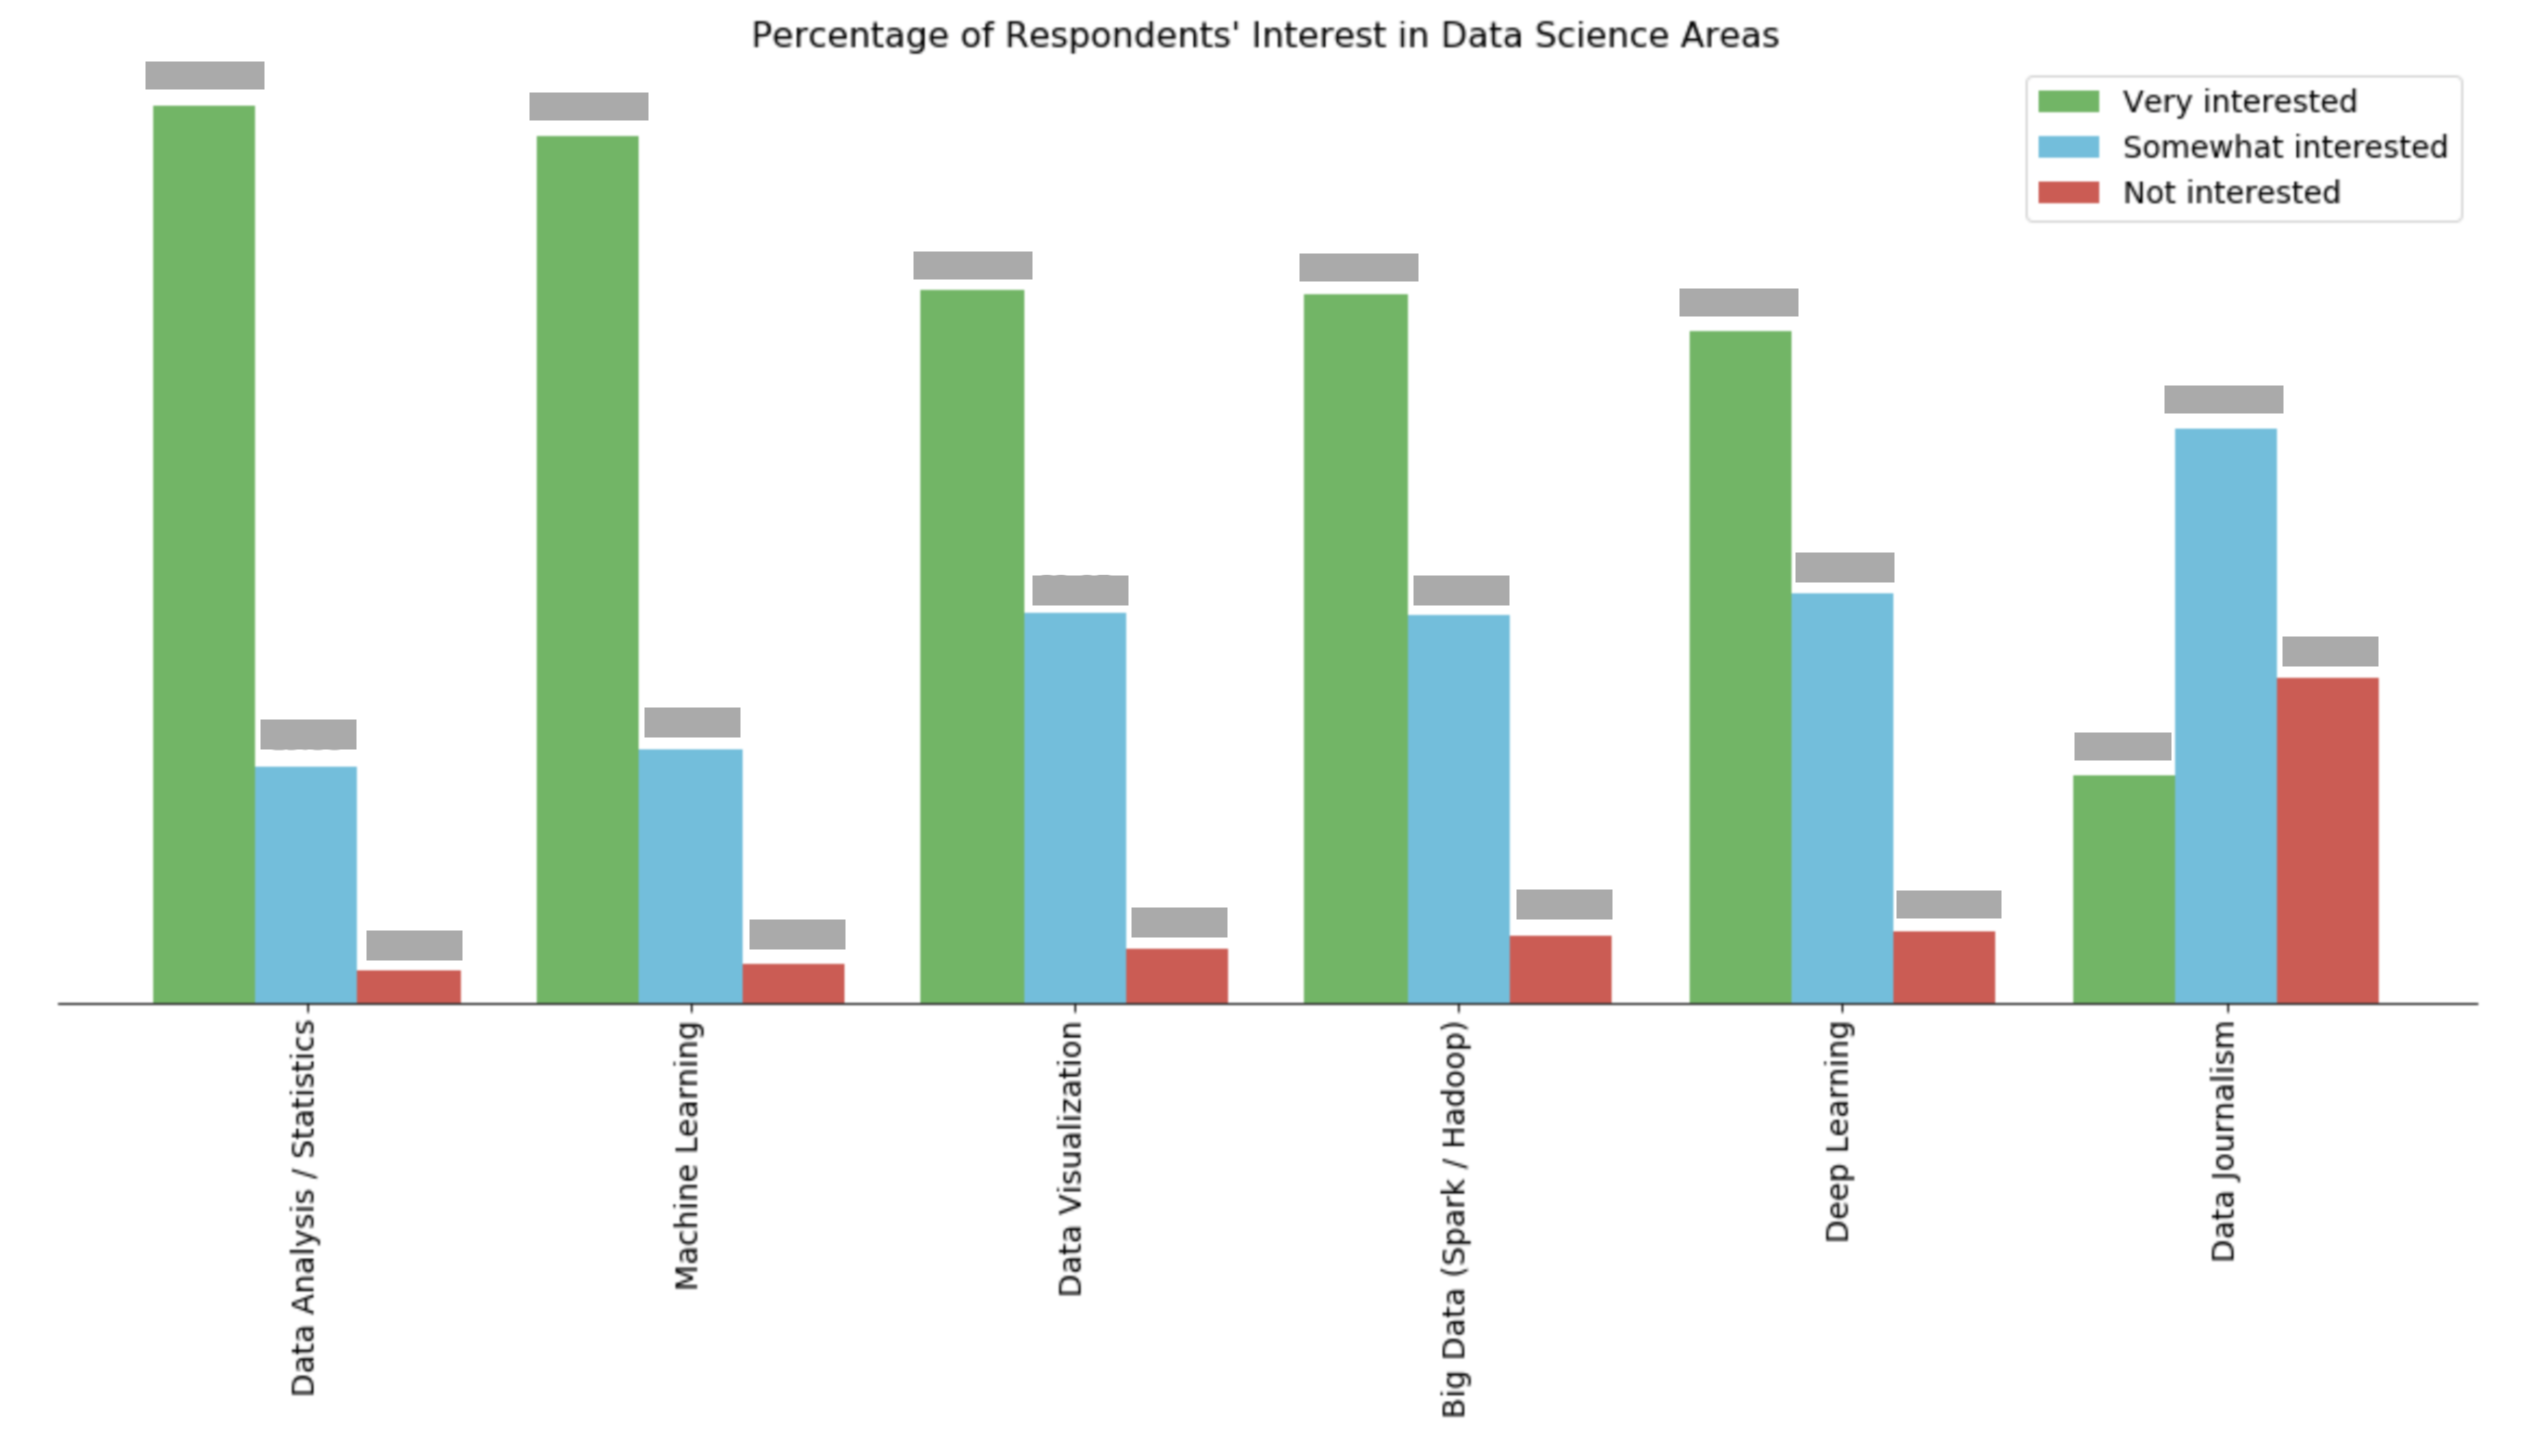

In [3]:
df_survey.sort_values(['Very interested'], ascending = False, inplace = True)

df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
df_percent = [(value / 2,233) for value in df_survey.loc[:, ['Very interested','Somewhat interested','Not interested']]]
df_percent

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
ax = df_survey.plot(kind='bar', 
                    width = 0.8, 
                    figsize=(20, 8),
                    color=['#5cb85c', '#5bc0de', '#d9534f']
                   )
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas', size = 16)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)